## Interaction with a displaced number State (DNS)

In [1]:
%matplotlib widget

from src.wigner_function import wignerQ
from src.plot_function import plot_wigner_electron, plot_wigner_photon
from src.wigner_methods import wigner_spectral_convolve, wigner_propagate
from qutip import basis, wigner, displace
import numpy as np
from math import pi

### Simulations input

In [2]:
nmax=30  # Max PINEM order
maxit=100 # Cutoff index for the Fock state summation
N_space=200 # Size of the photonic Hilbert space

ene_photon=1.55 # Photon energy in eV
g0=1.0 # Electron-photon coupling constant
prop_mm=0.0 # propagation distance after interaction in mm
ZLP_width=0.7 # Energy standard deviation in eV

nFock=3 # Fock state number
alpha=2 # Amplitude of the displacement
theta=pi/4 # Phase of the coherent state
alpha=alpha*np.exp(1j*theta) # Define the coherent state parameter

### Compute the initial photon Wigner function

In [3]:
# Define the displacement operator
d = displace(N_space, alpha) 
# Displace the Fock state n=1 to generate the DNS
psi_DNS=d*basis(N_space,nFock) 
# Compute the density matrix
rho_DNS=psi_DNS * psi_DNS.dag() 
# Sampling if the phase-space
xvec = np.linspace(-10,10,200) 
# Use Qtip to compute the photon Wigner function
W_photon = wigner(rho_DNS, xvec, xvec)

### Plot the initial photon Wigner function

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1.0, 2.0], width_ratios=[2.0, 1.0])

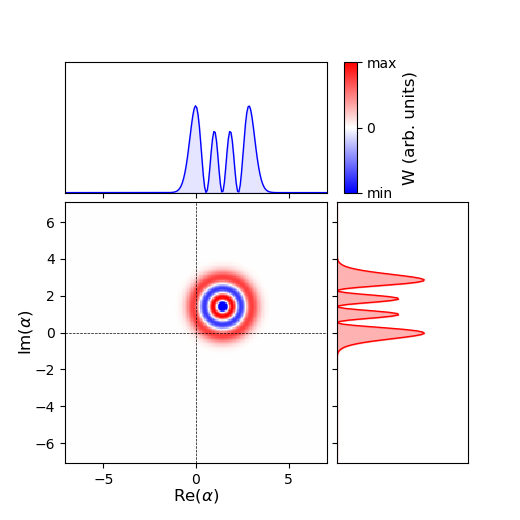

In [4]:
plot_wigner_photon(W_photon, xvec, xvec)

### Compute the electron Wigner function

In [5]:
# Initialize the alpha_table
ind_table=np.linspace(0,maxit+nmax+1,maxit+nmax+2) 
alpha_table=ind_table*0.0*1j
# Compute the alpha_table by projecting on each Fock state component
for i in range(np.size(ind_table)):
    ket=basis(N_space,i)
    alpha_table[i]=ket.overlap(psi_DNS)

In [6]:
# Compute the exact electron Wigner function
Wigner_DNS, sidebands_axis, z_axis  =wignerQ(ene_photon,g0,alpha_table,maxit,option='decimal')
# Convolve with ZLP
Wigner_DNS_convolved, p_axis = wigner_spectral_convolve(Wigner_DNS, ene_photon, ZLP_width)
# Propagation after interaction
Wigner_DNS_convolved_propagated=wigner_propagate(Wigner_DNS_convolved, p_axis, ene_photon, prop_mm)

loop over Fock states[████████████████████████████████████████] 100/100 Est wait 00:00.00



### Plot the electron Wigner function

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[3, 1])

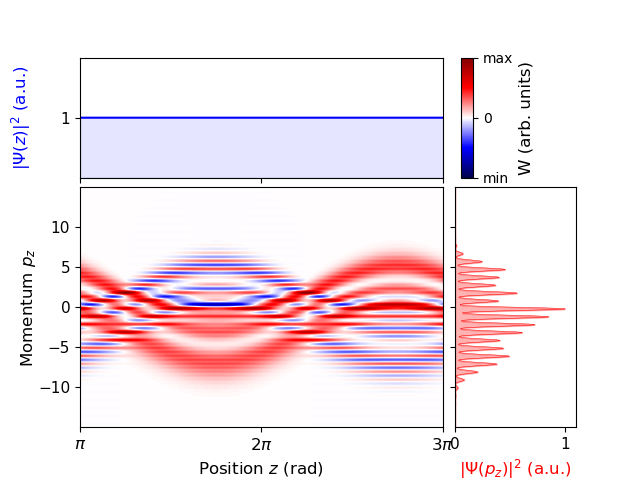

In [7]:
plot_wigner_electron(Wigner_DNS_convolved_propagated, p_axis, z_axis, ene_photon)

### Save the data

In [ ]:
#np.save('wigner_function.npy', Wigner_DNS_convolved_propagated)
#np.save('p_axis.npy', p_axis)
#p.save('z_axis.npy', z_axis)